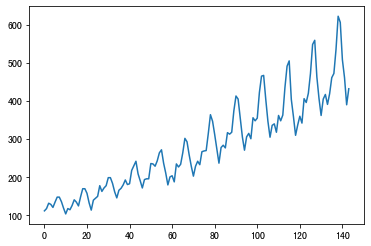

[0.25482625 0.24903475 0.23359074 0.26061776 0.2857143  0.2857143
 0.26254827 0.22972973 0.2007722  0.22779922 0.22200772 0.24324325
 0.27220076 0.26061776 0.24131274 0.28764477 0.32818532 0.32818532
 0.30501932 0.25675675 0.22007722 0.27027026 0.27992278 0.28957528
 0.34362933 0.3146718  0.33204633 0.34362933 0.38416988 0.38416988
 0.35521236 0.3127413  0.2818533  0.32046333 0.33011582 0.34749034
 0.37258688 0.34942085 0.35328186 0.4208494  0.44401544 0.46718147
 0.4034749  0.36872587 0.33204633 0.37451738 0.3783784  0.3783784
 0.45559844 0.45366797 0.44208494 0.46911198 0.5096525  0.52509654
 0.45752895 0.4073359  0.34749034 0.3880309  0.3938224  0.36293435
 0.45366797 0.43822393 0.45173746 0.5096525  0.58301157 0.56563705
 0.5        0.44208494 0.3918919  0.44208494 0.46718147 0.44980696
 0.51544404 0.519305   0.5212355  0.6081081  0.7027027  0.66988415
 0.6023166  0.52895755 0.45752895 0.53667957 0.54826254 0.53474903
 0.6119691  0.6042471  0.6138996  0.72200775 0.7972973  0.781853

In [7]:
# 使用RNN处理时序问题
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 数据加载
data = pd.read_csv('./flights.csv')
dataset_ori = data['passengers'].values.astype('float32')
plt.plot(dataset_ori)
plt.show()

#首先我们进行预处理，将数据中 na 的数据去掉，然后将数据标准化到 0 ~ 1 之间。
max_value = np.max(dataset_ori)
min_value = np.min(dataset_ori)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset_ori))
 
'''
look_back: 过去多少个月的乘客数
dataX: 生成的数据集X
dataY: 下一个月的乘客数
'''
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
    
# 创建输入输出
data_X, data_Y = create_dataset(dataset)
#print('data_x=', data_X)
#print('data_y=', data_Y)

# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.7)
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
print(train_Y)
'''
    改变数据的维度
    RNN读入的数据维度是 (batch, seq, feature)
    只有一个序列，所以 seq 是 1
    feature 代表依据的几个月份，这里定的是两个月份，所以 feature 就是 2
'''
import torch
print(train_X.shape)
print(train_Y.shape)
train_X = train_X.reshape(-1, 1, 2) #batch, seq, feature
train_Y = train_Y.reshape(-1, 1, 1) #batch, seq, feature
print(train_X.shape)
print(train_Y.shape)
train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)

 
#定义模型
from torch import nn
class rnn_model(nn.Module):
     def __init__(self):
          super(rnn_model, self).__init__()
          input_size, hidden_size, output_size=2, 4, 1
          num_layers=1
          self.rnn = nn.RNN(input_size, hidden_size, num_layers)
          #self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # LSTM参数更多，训练的epoach可能要更多
          #self.rnn = nn.GRU(input_size, hidden_size, num_layers)
          self.out = nn.Linear(hidden_size, output_size)
          
     def forward(self, x):
          x, _ = self.rnn(x) 
          print(x.shape)
          print(_.shape)
          b, s, h = x.shape  #(batch, seq, hidden)
          x = x.view(b*s, h) #转化为线性层的输入方式
          x = self.out(x)
          x = x.view(b, s, -1) #(99, 1, 1)
          return x
# 设置使用GPU
# cuda = torch.device('cuda')

#定义好网络结构，输入的维度是 2，因为我们使用两个月的流量作为输入，隐藏层的维度可以任意指定，这里我们选的 4
model = rnn_model()
# model = model.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
 
#开始训练
for epoch in range(1):
#      var_x = train_x.cuda()
#      var_y = train_y.cuda()
     var_x = train_x
     var_y = train_y
     # 前向传播
     out = model(var_x)
     # 计算损失函数
     loss = criterion(out, var_y)
     # 反向传播
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     if (epoch+1)%100==0:
          print('Epoch:{}, Loss:{:.5f}'.format(epoch+1, loss.item()))
     

In [9]:
np.array([1,2])

array([1, 2])